In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
import datetime
import hashlib
import random
from sklearn.linear_model import MultiTaskLassoCV
%matplotlib inline
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

#%matplotlib notebook

In [2]:
maize = pd.read_excel('MaizeImagelinks.xlsx')
maize.shape

(64954, 25)

## Cleaning data

In [41]:
#checking for duplicate rows
maize.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
64949    False
64950    False
64951    False
64952    False
64953    False
Length: 64954, dtype: bool

In [42]:
#removing duplicated rows
maize.drop_duplicates(inplace=True)
maize                                   #result: There were no duplicated rows

,_URI,_CREATOR_URI_USER,_CREATION_DATE,_LAST_UPDATE_URI_USER,_LAST_UPDATE_DATE,_MODEL_VERSION,_UI_VERSION,_IS_COMPLETE,_SUBMISSION_DATE,_MARKED_AS_COMPLETE_DATE,...,META_INSTANCE_ID,MAIZE_DATA_MAIZE_IMAGE_GPS_ALT,MAIZE_DATA_END_TIME,MAIZE_DATA_END_TIME_RAW,MAIZE_DATA_MAIZE_COMMENT,MAIZE_DATA_MAIZE_IMAGE_GPS_LAT,MAIZE_DATA_MAIZE_IMAGE_GPS_ACC,MAIZE_DATA_START_TIME,MAIZE_DATA_MAIZE_IMAGE_GPS_LNG,Unnamed: 24
0,uuid:751739fc-8820-42ee-a795-18e047d5e89c,anonymousUser,2019-09-23 00:37:18.097,NaN,2019-09-23 00:37:18.097,NaN,NaN,1,2019-09-23 00:37:18.090,2019-09-23 00:37:18.090,...,uuid:751739fc-8820-42ee-a795-18e047d5e89c,0.0,2019-09-23 00:37:06.339,2019-09-23T03:37:06.339+03,Typical,0.424174,2500.000,2019-09-23 00:36:35.533,32.598598,http://3.19.236.194:8080/ODKAggregate/view/bin...
1,uuid:02ba0fb4-6df1-4b4a-b2f6-89c1bf162280,anonymousUser,2019-09-23 13:09:26.402,NaN,2019-09-23 13:09:26.402,NaN,NaN,1,2019-09-23 13:09:26.387,2019-09-23 13:09:26.387,...,uuid:02ba0fb4-6df1-4b4a-b2f6-89c1bf162280,1150.7,2019-09-23 12:44:28.381,2019-09-23T15:44:28.381+03,Brown patches,0.521545,7.300,2019-09-23 12:42:48.673,32.625263,http://3.19.236.194:8080/ODKAggregate/view/bin...
2,uuid:164a12b9-46aa-4de4-a6b0-8a5154e4af8f,anonymousUser,2019-09-23 13:12:17.363,NaN,2019-09-23 13:12:17.363,NaN,NaN,1,2019-09-23 13:12:17.357,2019-09-23 13:12:17.357,...,uuid:164a12b9-46aa-4de4-a6b0-8a5154e4af8f,1127.3,2019-09-23 12:32:51.841,2019-09-23T15:32:51.841+03,Maize leaf streak lesion,0.521487,3.843,2019-09-23 12:31:16.699,32.625396,http://3.19.236.194:8080/ODKAggregate/view/bin...
3,uuid:ad7f56da-46cf-48b3-8ca1-898467514768,anonymousUser,2019-09-23 13:16:49.178,NaN,2019-09-23 13:16:49.178,NaN,NaN,1,2019-09-23 13:16:49.172,2019-09-23 13:16:49.172,...,uuid:ad7f56da-46cf-48b3-8ca1-898467514768,1148.4,2019-09-23 12:34:56.242,2019-09-23T15:34:56.242+03,Gray leaf,0.521514,4.922,2019-09-23 12:33:59.443,32.625405,http://3.19.236.194:8080/ODKAggregate/view/bin...
4,uuid:df5866fb-b0cd-4160-a318-9700f4392ba5,anonymousUser,2019-09-23 13:23:17.059,NaN,2019-09-23 13:23:17.059,NaN,NaN,1,2019-09-23 13:23:17.019,2019-09-23 13:23:17.019,...,uuid:df5866fb-b0cd-4160-a318-9700f4392ba5,1152.4,2019-09-23 12:38:40.203,2019-09-23T15:38:40.203+03,Stemborer,0.521526,10.000,2019-09-23 12:36:32.824,32.625352,http://3.19.236.194:8080/ODKAggregate/view/bin...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64949,uuid:36571be6-b2be-4720-a77e-318aa5375fec,anonymousUser,2020-04-26 15:57:00.703,NaN,2020-04-26 15:57:00.703,NaN,NaN,1,2020-04-26 15:57:00.690,2020-04-26 15:57:00.690,...,uuid:36571be6-b2be-4720-a77e-318aa5375fec,1145.9,2020-04-26 13:21:58.642,2020-04-26T16:21:58.642+03,NaN,0.715672,4.218,2020-04-26 13:21:08.817,32.422988,http://3.19.236.194:8080/ODKAggregate/view/bin...
64950,uuid:c3b28fff-8f27-4811-bd28-325828e294d5,anonymousUser,2020-04-26 15:57:28.108,NaN,2020-04-26 15:57:28.108,NaN,NaN,1,2020-04-26 15:57:28.094,2020-04-26 15:57:28.094,...,uuid:c3b28fff-8f27-4811-bd28-325828e294d5,1139.5,2020-04-26 13:32:08.688,2020-04-26T16:32:08.688+03,NaN,0.715513,4.196,2020-04-26 13:31:38.803,32.423071,http://3.19.236.194:8080/ODKAggregate/view/bin...
64951,uuid:89207c60-743f-4953-b7d6-457edd25fd29,anonymousUser,2020-04-26 16:32:44.278,NaN,2020-04-26 16:32:44.278,NaN,NaN,1,2020-04-26 16:32:44.272,2020-04-26 16:32:44.272,...,uuid:89207c60-743f-4953-b7d6-457edd25fd29,1145.9,2020-04-26 16:28:12.884,2020-04-26T19:28:12.884+03,NaN,0.715449,4.457,2020-04-26 13:41:13.500,32.423232,http://3.19.236.194:8080/ODKAggregate/view/bin...
64952,uuid:1d7afd17-1556-44f7-b638-5b90059949c9,anonymousUser,2020-04-26 16:32:55.219,NaN,2020-04-26 16:32:55.219,NaN,NaN,1,2020-04-26 16:32:55.206,2020-04-26 16:32:55.206,...,uuid:1d7afd17-1556-44f7-b638-5b90059949c9,1145.9,2020-04-26 16:28:27.532,2020-04-26T19:28:27.532+03,NaN,0.715379,4.624,2020-04-26 13:47:18.264,32.423289,http://3.19.236.194:8080/ODKAggregate/view/bin...


In [43]:
maize.columns

Index(['_URI', '_CREATOR_URI_USER', '_CREATION_DATE', '_LAST_UPDATE_URI_USER',
       '_LAST_UPDATE_DATE', '_MODEL_VERSION', '_UI_VERSION', '_IS_COMPLETE',
       '_SUBMISSION_DATE', '_MARKED_AS_COMPLETE_DATE',
       'MAIZE_DATA_MAIZE_IMAGE_CLASS', 'MAIZE_DATA_SUBMISSION_TIME_RAW',
       'MAIZE_DATA_START_TIME_RAW', 'MAIZE_DATA_DEVICE_ID',
       'MAIZE_DATA_SUBMISSION_TIME', 'META_INSTANCE_ID',
       'MAIZE_DATA_MAIZE_IMAGE_GPS_ALT', 'MAIZE_DATA_END_TIME',
       'MAIZE_DATA_END_TIME_RAW', 'MAIZE_DATA_MAIZE_COMMENT',
       'MAIZE_DATA_MAIZE_IMAGE_GPS_LAT', 'MAIZE_DATA_MAIZE_IMAGE_GPS_ACC',
       'MAIZE_DATA_START_TIME', 'MAIZE_DATA_MAIZE_IMAGE_GPS_LNG',
       'Unnamed: 24'],
      dtype='object')

In [37]:
#treat spaces as null values
#parse the dates
maize = pd.read_excel('MaizeImagelinks.xlsx', na_values=['',' '], parse_dates=["_CREATION_DATE","_LAST_UPDATE_DATE","_MARKED_AS_COMPLETE_DATE","_SUBMISSION_DATE"])
maize

,_URI,_CREATOR_URI_USER,_CREATION_DATE,_LAST_UPDATE_URI_USER,_LAST_UPDATE_DATE,_MODEL_VERSION,_UI_VERSION,_IS_COMPLETE,_SUBMISSION_DATE,_MARKED_AS_COMPLETE_DATE,...,META_INSTANCE_ID,MAIZE_DATA_MAIZE_IMAGE_GPS_ALT,MAIZE_DATA_END_TIME,MAIZE_DATA_END_TIME_RAW,MAIZE_DATA_MAIZE_COMMENT,MAIZE_DATA_MAIZE_IMAGE_GPS_LAT,MAIZE_DATA_MAIZE_IMAGE_GPS_ACC,MAIZE_DATA_START_TIME,MAIZE_DATA_MAIZE_IMAGE_GPS_LNG,Unnamed: 24
0,uuid:751739fc-8820-42ee-a795-18e047d5e89c,anonymousUser,2019-09-23 00:37:18.097,NaN,2019-09-23 00:37:18.097,NaN,NaN,1,2019-09-23 00:37:18.090,2019-09-23 00:37:18.090,...,uuid:751739fc-8820-42ee-a795-18e047d5e89c,0.0,2019-09-23 00:37:06.339,2019-09-23T03:37:06.339+03,Typical,0.424174,2500.000,2019-09-23 00:36:35.533,32.598598,http://3.19.236.194:8080/ODKAggregate/view/bin...
1,uuid:02ba0fb4-6df1-4b4a-b2f6-89c1bf162280,anonymousUser,2019-09-23 13:09:26.402,NaN,2019-09-23 13:09:26.402,NaN,NaN,1,2019-09-23 13:09:26.387,2019-09-23 13:09:26.387,...,uuid:02ba0fb4-6df1-4b4a-b2f6-89c1bf162280,1150.7,2019-09-23 12:44:28.381,2019-09-23T15:44:28.381+03,Brown patches,0.521545,7.300,2019-09-23 12:42:48.673,32.625263,http://3.19.236.194:8080/ODKAggregate/view/bin...
2,uuid:164a12b9-46aa-4de4-a6b0-8a5154e4af8f,anonymousUser,2019-09-23 13:12:17.363,NaN,2019-09-23 13:12:17.363,NaN,NaN,1,2019-09-23 13:12:17.357,2019-09-23 13:12:17.357,...,uuid:164a12b9-46aa-4de4-a6b0-8a5154e4af8f,1127.3,2019-09-23 12:32:51.841,2019-09-23T15:32:51.841+03,Maize leaf streak lesion,0.521487,3.843,2019-09-23 12:31:16.699,32.625396,http://3.19.236.194:8080/ODKAggregate/view/bin...
3,uuid:ad7f56da-46cf-48b3-8ca1-898467514768,anonymousUser,2019-09-23 13:16:49.178,NaN,2019-09-23 13:16:49.178,NaN,NaN,1,2019-09-23 13:16:49.172,2019-09-23 13:16:49.172,...,uuid:ad7f56da-46cf-48b3-8ca1-898467514768,1148.4,2019-09-23 12:34:56.242,2019-09-23T15:34:56.242+03,Gray leaf,0.521514,4.922,2019-09-23 12:33:59.443,32.625405,http://3.19.236.194:8080/ODKAggregate/view/bin...
4,uuid:df5866fb-b0cd-4160-a318-9700f4392ba5,anonymousUser,2019-09-23 13:23:17.059,NaN,2019-09-23 13:23:17.059,NaN,NaN,1,2019-09-23 13:23:17.019,2019-09-23 13:23:17.019,...,uuid:df5866fb-b0cd-4160-a318-9700f4392ba5,1152.4,2019-09-23 12:38:40.203,2019-09-23T15:38:40.203+03,Stemborer,0.521526,10.000,2019-09-23 12:36:32.824,32.625352,http://3.19.236.194:8080/ODKAggregate/view/bin...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64949,uuid:36571be6-b2be-4720-a77e-318aa5375fec,anonymousUser,2020-04-26 15:57:00.703,NaN,2020-04-26 15:57:00.703,NaN,NaN,1,2020-04-26 15:57:00.690,2020-04-26 15:57:00.690,...,uuid:36571be6-b2be-4720-a77e-318aa5375fec,1145.9,2020-04-26 13:21:58.642,2020-04-26T16:21:58.642+03,NaN,0.715672,4.218,2020-04-26 13:21:08.817,32.422988,http://3.19.236.194:8080/ODKAggregate/view/bin...
64950,uuid:c3b28fff-8f27-4811-bd28-325828e294d5,anonymousUser,2020-04-26 15:57:28.108,NaN,2020-04-26 15:57:28.108,NaN,NaN,1,2020-04-26 15:57:28.094,2020-04-26 15:57:28.094,...,uuid:c3b28fff-8f27-4811-bd28-325828e294d5,1139.5,2020-04-26 13:32:08.688,2020-04-26T16:32:08.688+03,NaN,0.715513,4.196,2020-04-26 13:31:38.803,32.423071,http://3.19.236.194:8080/ODKAggregate/view/bin...
64951,uuid:89207c60-743f-4953-b7d6-457edd25fd29,anonymousUser,2020-04-26 16:32:44.278,NaN,2020-04-26 16:32:44.278,NaN,NaN,1,2020-04-26 16:32:44.272,2020-04-26 16:32:44.272,...,uuid:89207c60-743f-4953-b7d6-457edd25fd29,1145.9,2020-04-26 16:28:12.884,2020-04-26T19:28:12.884+03,NaN,0.715449,4.457,2020-04-26 13:41:13.500,32.423232,http://3.19.236.194:8080/ODKAggregate/view/bin...
64952,uuid:1d7afd17-1556-44f7-b638-5b90059949c9,anonymousUser,2020-04-26 16:32:55.219,NaN,2020-04-26 16:32:55.219,NaN,NaN,1,2020-04-26 16:32:55.206,2020-04-26 16:32:55.206,...,uuid:1d7afd17-1556-44f7-b638-5b90059949c9,1145.9,2020-04-26 16:28:27.532,2020-04-26T19:28:27.532+03,NaN,0.715379,4.624,2020-04-26 13:47:18.264,32.423289,http://3.19.236.194:8080/ODKAggregate/view/bin...


In [8]:
#checking for information about the data
maize.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64954 entries, 0 to 64953
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   _URI                            64954 non-null  object        
 1   _CREATOR_URI_USER               64954 non-null  object        
 2   _CREATION_DATE                  64954 non-null  datetime64[ns]
 3   _LAST_UPDATE_URI_USER           975 non-null    object        
 4   _LAST_UPDATE_DATE               64954 non-null  datetime64[ns]
 5   _MODEL_VERSION                  0 non-null      float64       
 6   _UI_VERSION                     0 non-null      float64       
 7   _IS_COMPLETE                    64954 non-null  int64         
 8   _SUBMISSION_DATE                64954 non-null  datetime64[ns]
 9   _MARKED_AS_COMPLETE_DATE        53749 non-null  datetime64[ns]
 10  MAIZE_DATA_MAIZE_IMAGE_CLASS    64953 non-null  object        
 11  MA

In [38]:
maize['Unnamed: 24']

0        http://3.19.236.194:8080/ODKAggregate/view/bin...
1        http://3.19.236.194:8080/ODKAggregate/view/bin...
2        http://3.19.236.194:8080/ODKAggregate/view/bin...
3        http://3.19.236.194:8080/ODKAggregate/view/bin...
4        http://3.19.236.194:8080/ODKAggregate/view/bin...
                               ...                        
64949    http://3.19.236.194:8080/ODKAggregate/view/bin...
64950    http://3.19.236.194:8080/ODKAggregate/view/bin...
64951    http://3.19.236.194:8080/ODKAggregate/view/bin...
64952    http://3.19.236.194:8080/ODKAggregate/view/bin...
64953    http://3.19.236.194:8080/ODKAggregate/view/bin...
Name: Unnamed: 24, Length: 64954, dtype: object

In [10]:
#replacing NaN values in the chosen columns
#Columns with object datatype were replaced with an empty string
#Columns with a float datatype were replaced with a zero

maize['_LAST_UPDATE_URI_USER'].fillna("", inplace=True)
maize['_MODEL_VERSION'].fillna(0, inplace=True)
maize['_UI_VERSION'].fillna(0, inplace=True)
maize['MAIZE_DATA_MAIZE_COMMENT'].fillna("", inplace=True)
maize

,_URI,_CREATOR_URI_USER,_CREATION_DATE,_LAST_UPDATE_URI_USER,_LAST_UPDATE_DATE,_MODEL_VERSION,_UI_VERSION,_IS_COMPLETE,_SUBMISSION_DATE,_MARKED_AS_COMPLETE_DATE,...,META_INSTANCE_ID,MAIZE_DATA_MAIZE_IMAGE_GPS_ALT,MAIZE_DATA_END_TIME,MAIZE_DATA_END_TIME_RAW,MAIZE_DATA_MAIZE_COMMENT,MAIZE_DATA_MAIZE_IMAGE_GPS_LAT,MAIZE_DATA_MAIZE_IMAGE_GPS_ACC,MAIZE_DATA_START_TIME,MAIZE_DATA_MAIZE_IMAGE_GPS_LNG,Unnamed: 24
0,uuid:751739fc-8820-42ee-a795-18e047d5e89c,anonymousUser,2019-09-23 00:37:18.097,,2019-09-23 00:37:18.097,0.0,0.0,1,2019-09-23 00:37:18.090,2019-09-23 00:37:18.090,...,uuid:751739fc-8820-42ee-a795-18e047d5e89c,0.0,2019-09-23 00:37:06.339,2019-09-23T03:37:06.339+03,Typical,0.424174,2500.000,2019-09-23 00:36:35.533,32.598598,http://3.19.236.194:8080/ODKAggregate/view/bin...
1,uuid:02ba0fb4-6df1-4b4a-b2f6-89c1bf162280,anonymousUser,2019-09-23 13:09:26.402,,2019-09-23 13:09:26.402,0.0,0.0,1,2019-09-23 13:09:26.387,2019-09-23 13:09:26.387,...,uuid:02ba0fb4-6df1-4b4a-b2f6-89c1bf162280,1150.7,2019-09-23 12:44:28.381,2019-09-23T15:44:28.381+03,Brown patches,0.521545,7.300,2019-09-23 12:42:48.673,32.625263,http://3.19.236.194:8080/ODKAggregate/view/bin...
2,uuid:164a12b9-46aa-4de4-a6b0-8a5154e4af8f,anonymousUser,2019-09-23 13:12:17.363,,2019-09-23 13:12:17.363,0.0,0.0,1,2019-09-23 13:12:17.357,2019-09-23 13:12:17.357,...,uuid:164a12b9-46aa-4de4-a6b0-8a5154e4af8f,1127.3,2019-09-23 12:32:51.841,2019-09-23T15:32:51.841+03,Maize leaf streak lesion,0.521487,3.843,2019-09-23 12:31:16.699,32.625396,http://3.19.236.194:8080/ODKAggregate/view/bin...
3,uuid:ad7f56da-46cf-48b3-8ca1-898467514768,anonymousUser,2019-09-23 13:16:49.178,,2019-09-23 13:16:49.178,0.0,0.0,1,2019-09-23 13:16:49.172,2019-09-23 13:16:49.172,...,uuid:ad7f56da-46cf-48b3-8ca1-898467514768,1148.4,2019-09-23 12:34:56.242,2019-09-23T15:34:56.242+03,Gray leaf,0.521514,4.922,2019-09-23 12:33:59.443,32.625405,http://3.19.236.194:8080/ODKAggregate/view/bin...
4,uuid:df5866fb-b0cd-4160-a318-9700f4392ba5,anonymousUser,2019-09-23 13:23:17.059,,2019-09-23 13:23:17.059,0.0,0.0,1,2019-09-23 13:23:17.019,2019-09-23 13:23:17.019,...,uuid:df5866fb-b0cd-4160-a318-9700f4392ba5,1152.4,2019-09-23 12:38:40.203,2019-09-23T15:38:40.203+03,Stemborer,0.521526,10.000,2019-09-23 12:36:32.824,32.625352,http://3.19.236.194:8080/ODKAggregate/view/bin...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64949,uuid:36571be6-b2be-4720-a77e-318aa5375fec,anonymousUser,2020-04-26 15:57:00.703,,2020-04-26 15:57:00.703,0.0,0.0,1,2020-04-26 15:57:00.690,2020-04-26 15:57:00.690,...,uuid:36571be6-b2be-4720-a77e-318aa5375fec,1145.9,2020-04-26 13:21:58.642,2020-04-26T16:21:58.642+03,,0.715672,4.218,2020-04-26 13:21:08.817,32.422988,http://3.19.236.194:8080/ODKAggregate/view/bin...
64950,uuid:c3b28fff-8f27-4811-bd28-325828e294d5,anonymousUser,2020-04-26 15:57:28.108,,2020-04-26 15:57:28.108,0.0,0.0,1,2020-04-26 15:57:28.094,2020-04-26 15:57:28.094,...,uuid:c3b28fff-8f27-4811-bd28-325828e294d5,1139.5,2020-04-26 13:32:08.688,2020-04-26T16:32:08.688+03,,0.715513,4.196,2020-04-26 13:31:38.803,32.423071,http://3.19.236.194:8080/ODKAggregate/view/bin...
64951,uuid:89207c60-743f-4953-b7d6-457edd25fd29,anonymousUser,2020-04-26 16:32:44.278,,2020-04-26 16:32:44.278,0.0,0.0,1,2020-04-26 16:32:44.272,2020-04-26 16:32:44.272,...,uuid:89207c60-743f-4953-b7d6-457edd25fd29,1145.9,2020-04-26 16:28:12.884,2020-04-26T19:28:12.884+03,,0.715449,4.457,2020-04-26 13:41:13.500,32.423232,http://3.19.236.194:8080/ODKAggregate/view/bin...
64952,uuid:1d7afd17-1556-44f7-b638-5b90059949c9,anonymousUser,2020-04-26 16:32:55.219,,2020-04-26 16:32:55.219,0.0,0.0,1,2020-04-26 16:32:55.206,2020-04-26 16:32:55.206,...,uuid:1d7afd17-1556-44f7-b638-5b90059949c9,1145.9,2020-04-26 16:28:27.532,2020-04-26T19:28:27.532+03,,0.715379,4.624,2020-04-26 13:47:18.264,32.423289,http://3.19.236.194:8080/ODKAggregate/view/bin...


In [44]:
maize.head()

,_URI,_CREATOR_URI_USER,_CREATION_DATE,_LAST_UPDATE_URI_USER,_LAST_UPDATE_DATE,_MODEL_VERSION,_UI_VERSION,_IS_COMPLETE,_SUBMISSION_DATE,_MARKED_AS_COMPLETE_DATE,...,META_INSTANCE_ID,MAIZE_DATA_MAIZE_IMAGE_GPS_ALT,MAIZE_DATA_END_TIME,MAIZE_DATA_END_TIME_RAW,MAIZE_DATA_MAIZE_COMMENT,MAIZE_DATA_MAIZE_IMAGE_GPS_LAT,MAIZE_DATA_MAIZE_IMAGE_GPS_ACC,MAIZE_DATA_START_TIME,MAIZE_DATA_MAIZE_IMAGE_GPS_LNG,Unnamed: 24
0,uuid:751739fc-8820-42ee-a795-18e047d5e89c,anonymousUser,2019-09-23 00:37:18.097,NaN,2019-09-23 00:37:18.097,NaN,NaN,1,2019-09-23 00:37:18.090,2019-09-23 00:37:18.090,...,uuid:751739fc-8820-42ee-a795-18e047d5e89c,0.0,2019-09-23 00:37:06.339,2019-09-23T03:37:06.339+03,Typical,0.424174,2500.000,2019-09-23 00:36:35.533,32.598598,http://3.19.236.194:8080/ODKAggregate/view/bin...
1,uuid:02ba0fb4-6df1-4b4a-b2f6-89c1bf162280,anonymousUser,2019-09-23 13:09:26.402,NaN,2019-09-23 13:09:26.402,NaN,NaN,1,2019-09-23 13:09:26.387,2019-09-23 13:09:26.387,...,uuid:02ba0fb4-6df1-4b4a-b2f6-89c1bf162280,1150.7,2019-09-23 12:44:28.381,2019-09-23T15:44:28.381+03,Brown patches,0.521545,7.300,2019-09-23 12:42:48.673,32.625263,http://3.19.236.194:8080/ODKAggregate/view/bin...
2,uuid:164a12b9-46aa-4de4-a6b0-8a5154e4af8f,anonymousUser,2019-09-23 13:12:17.363,NaN,2019-09-23 13:12:17.363,NaN,NaN,1,2019-09-23 13:12:17.357,2019-09-23 13:12:17.357,...,uuid:164a12b9-46aa-4de4-a6b0-8a5154e4af8f,1127.3,2019-09-23 12:32:51.841,2019-09-23T15:32:51.841+03,Maize leaf streak lesion,0.521487,3.843,2019-09-23 12:31:16.699,32.625396,http://3.19.236.194:8080/ODKAggregate/view/bin...
3,uuid:ad7f56da-46cf-48b3-8ca1-898467514768,anonymousUser,2019-09-23 13:16:49.178,NaN,2019-09-23 13:16:49.178,NaN,NaN,1,2019-09-23 13:16:49.172,2019-09-23 13:16:49.172,...,uuid:ad7f56da-46cf-48b3-8ca1-898467514768,1148.4,2019-09-23 12:34:56.242,2019-09-23T15:34:56.242+03,Gray leaf,0.521514,4.922,2019-09-23 12:33:59.443,32.625405,http://3.19.236.194:8080/ODKAggregate/view/bin...
4,uuid:df5866fb-b0cd-4160-a318-9700f4392ba5,anonymousUser,2019-09-23 13:23:17.059,NaN,2019-09-23 13:23:17.059,NaN,NaN,1,2019-09-23 13:23:17.019,2019-09-23 13:23:17.019,...,uuid:df5866fb-b0cd-4160-a318-9700f4392ba5,1152.4,2019-09-23 12:38:40.203,2019-09-23T15:38:40.203+03,Stemborer,0.521526,10.000,2019-09-23 12:36:32.824,32.625352,http://3.19.236.194:8080/ODKAggregate/view/bin...


In [45]:
maize.columns

Index(['_URI', '_CREATOR_URI_USER', '_CREATION_DATE', '_LAST_UPDATE_URI_USER',
       '_LAST_UPDATE_DATE', '_MODEL_VERSION', '_UI_VERSION', '_IS_COMPLETE',
       '_SUBMISSION_DATE', '_MARKED_AS_COMPLETE_DATE',
       'MAIZE_DATA_MAIZE_IMAGE_CLASS', 'MAIZE_DATA_SUBMISSION_TIME_RAW',
       'MAIZE_DATA_START_TIME_RAW', 'MAIZE_DATA_DEVICE_ID',
       'MAIZE_DATA_SUBMISSION_TIME', 'META_INSTANCE_ID',
       'MAIZE_DATA_MAIZE_IMAGE_GPS_ALT', 'MAIZE_DATA_END_TIME',
       'MAIZE_DATA_END_TIME_RAW', 'MAIZE_DATA_MAIZE_COMMENT',
       'MAIZE_DATA_MAIZE_IMAGE_GPS_LAT', 'MAIZE_DATA_MAIZE_IMAGE_GPS_ACC',
       'MAIZE_DATA_START_TIME', 'MAIZE_DATA_MAIZE_IMAGE_GPS_LNG',
       'Unnamed: 24'],
      dtype='object')

In [3]:
#rename the columns so as to easily understand the data
maize.rename(columns={'_URI':'ID','_CREATOR_URI_USER':'CREATOR_USER_ID','_CREATION_DATE':'CREATION_DATE','_LAST_UPDATE_URI_USER':'LAST_UPDATE_USER_ID',
                        '_LAST_UPDATE_DATE':'LAST_UPDATE_DATE','_MODEL_VERSION':'MODEL_VERSION',
                       '_UI_VERSION':'UI_VERSION','_IS_COMPLETE':'IS_COMPLETE','_SUBMISSION_DATE':'SUBMISSION_DATE', 'MAIZE_DATA_DEVICE_ID':'MAIZE_DEVICE_ID',
                       '_MARKED_AS_COMPLETE_DATE':'MARKED_AS_COMPLETE_DATE','MAIZE_DATA_MAIZE_IMAGE_CLASS':'MAIZE_IMAGE_CLASS', 'MAIZE_DATA_MAIZE_COMMENT':'MAIZE_DATA_COMMENT',
                       'MAIZE_DATA_MAIZE_IMAGE_GPS_ALT':'MAIZE_GPS_ALT','MAIZE_DATA_MAIZE_IMAGE_GPS_LNG':'MAIZE_GPS_LNG',
                       'MAIZE_DATA_MAIZE_IMAGE_GPS_LAT':'MAIZE_GPS_LAT','MAIZE_DATA_MAIZE_IMAGE_GPS_ACC':'MAIZE_GPS_ACC', 'Unnamed: 24':'MAIZE_IMAGE_LINKS'}, inplace=True)
maize.head(3)

,ID,CREATOR_USER_ID,CREATION_DATE,LAST_UPDATE_USER_ID,LAST_UPDATE_DATE,MODEL_VERSION,UI_VERSION,IS_COMPLETE,SUBMISSION_DATE,MARKED_AS_COMPLETE_DATE,...,META_INSTANCE_ID,MAIZE_GPS_ALT,MAIZE_DATA_END_TIME,MAIZE_DATA_END_TIME_RAW,MAIZE_DATA_COMMENT,MAIZE_GPS_LAT,MAIZE_GPS_ACC,MAIZE_DATA_START_TIME,MAIZE_GPS_LNG,MAIZE_IMAGE_LINKS
0,uuid:751739fc-8820-42ee-a795-18e047d5e89c,anonymousUser,2019-09-23 00:37:18.097,NaN,2019-09-23 00:37:18.097,NaN,NaN,1,2019-09-23 00:37:18.090,2019-09-23 00:37:18.090,...,uuid:751739fc-8820-42ee-a795-18e047d5e89c,0.0,2019-09-23 00:37:06.339,2019-09-23T03:37:06.339+03,Typical,0.424174,2500.000,2019-09-23 00:36:35.533,32.598598,http://3.19.236.194:8080/ODKAggregate/view/bin...
1,uuid:02ba0fb4-6df1-4b4a-b2f6-89c1bf162280,anonymousUser,2019-09-23 13:09:26.402,NaN,2019-09-23 13:09:26.402,NaN,NaN,1,2019-09-23 13:09:26.387,2019-09-23 13:09:26.387,...,uuid:02ba0fb4-6df1-4b4a-b2f6-89c1bf162280,1150.7,2019-09-23 12:44:28.381,2019-09-23T15:44:28.381+03,Brown patches,0.521545,7.300,2019-09-23 12:42:48.673,32.625263,http://3.19.236.194:8080/ODKAggregate/view/bin...
2,uuid:164a12b9-46aa-4de4-a6b0-8a5154e4af8f,anonymousUser,2019-09-23 13:12:17.363,NaN,2019-09-23 13:12:17.363,NaN,NaN,1,2019-09-23 13:12:17.357,2019-09-23 13:12:17.357,...,uuid:164a12b9-46aa-4de4-a6b0-8a5154e4af8f,1127.3,2019-09-23 12:32:51.841,2019-09-23T15:32:51.841+03,Maize leaf streak lesion,0.521487,3.843,2019-09-23 12:31:16.699,32.625396,http://3.19.236.194:8080/ODKAggregate/view/bin...


In [4]:
maize.columns

Index(['ID', 'CREATOR_USER_ID', 'CREATION_DATE', 'LAST_UPDATE_USER_ID',
       'LAST_UPDATE_DATE', 'MODEL_VERSION', 'UI_VERSION', 'IS_COMPLETE',
       'SUBMISSION_DATE', 'MARKED_AS_COMPLETE_DATE', 'MAIZE_IMAGE_CLASS',
       'MAIZE_DATA_SUBMISSION_TIME_RAW', 'MAIZE_DATA_START_TIME_RAW',
       'MAIZE_DEVICE_ID', 'MAIZE_DATA_SUBMISSION_TIME', 'META_INSTANCE_ID',
       'MAIZE_GPS_ALT', 'MAIZE_DATA_END_TIME', 'MAIZE_DATA_END_TIME_RAW',
       'MAIZE_DATA_COMMENT', 'MAIZE_GPS_LAT', 'MAIZE_GPS_ACC',
       'MAIZE_DATA_START_TIME', 'MAIZE_GPS_LNG', 'MAIZE_IMAGE_LINKS'],
      dtype='object')

### Anonymizing sensitive user data (MAIZE_DEVICE_ID column) using the hashing method

In [50]:
maize['MAIZE_DEVICE_ID'] = [hashlib.sha1(str.encode(str(i))).hexdigest() for i in maize['MAIZE_DEVICE_ID']]
display(maize.head(3))

,ID,CREATOR_USER_ID,CREATION_DATE,LAST_UPDATE_USER_ID,LAST_UPDATE_DATE,MODEL_VERSION,UI_VERSION,IS_COMPLETE,SUBMISSION_DATE,MARKED_AS_COMPLETE_DATE,...,META_INSTANCE_ID,MAIZE_GPS_ALT,MAIZE_DATA_END_TIME,MAIZE_DATA_END_TIME_RAW,MAIZE_DATA_COMMENT,MAIZE_GPS_LAT,MAIZE_GPS_ACC,MAIZE_DATA_START_TIME,MAIZE_GPS_LNG,MAIZE_IMAGE_LINKS
0,uuid:751739fc-8820-42ee-a795-18e047d5e89c,anonymousUser,2019-09-23 00:37:18.097,NaN,2019-09-23 00:37:18.097,NaN,NaN,1,2019-09-23 00:37:18.090,2019-09-23 00:37:18.090,...,uuid:751739fc-8820-42ee-a795-18e047d5e89c,0.0,2019-09-23 00:37:06.339,2019-09-23T03:37:06.339+03,Typical,0.424174,2500.000,2019-09-23 00:36:35.533,32.598598,http://3.19.236.194:8080/ODKAggregate/view/bin...
1,uuid:02ba0fb4-6df1-4b4a-b2f6-89c1bf162280,anonymousUser,2019-09-23 13:09:26.402,NaN,2019-09-23 13:09:26.402,NaN,NaN,1,2019-09-23 13:09:26.387,2019-09-23 13:09:26.387,...,uuid:02ba0fb4-6df1-4b4a-b2f6-89c1bf162280,1150.7,2019-09-23 12:44:28.381,2019-09-23T15:44:28.381+03,Brown patches,0.521545,7.300,2019-09-23 12:42:48.673,32.625263,http://3.19.236.194:8080/ODKAggregate/view/bin...
2,uuid:164a12b9-46aa-4de4-a6b0-8a5154e4af8f,anonymousUser,2019-09-23 13:12:17.363,NaN,2019-09-23 13:12:17.363,NaN,NaN,1,2019-09-23 13:12:17.357,2019-09-23 13:12:17.357,...,uuid:164a12b9-46aa-4de4-a6b0-8a5154e4af8f,1127.3,2019-09-23 12:32:51.841,2019-09-23T15:32:51.841+03,Maize leaf streak lesion,0.521487,3.843,2019-09-23 12:31:16.699,32.625396,http://3.19.236.194:8080/ODKAggregate/view/bin...


In [51]:
maize['MAIZE_DEVICE_ID']

0        11e623a37e87cf7995c466723ec99688d55cae8c
1        9b5ae6256ef75e52de9b5966f5c540ab49480488
2        5a4bc2394c367b568736478d6408edb020e6b445
3        9141762b2d7ba00c2b3f60a4ecd9f9e75e32294e
4        73f594a2b17952f783b9a8a773396274b2d8ebe6
                           ...                   
64949    063b08634aeb92f59e35bcda7d0ad6c730f064c1
64950    063b08634aeb92f59e35bcda7d0ad6c730f064c1
64951    063b08634aeb92f59e35bcda7d0ad6c730f064c1
64952    063b08634aeb92f59e35bcda7d0ad6c730f064c1
64953    063b08634aeb92f59e35bcda7d0ad6c730f064c1
Name: MAIZE_DEVICE_ID, Length: 64954, dtype: object

In [52]:
# drop the meta_instance_id column because it has same meaning as the ID/URI column
maize.drop(['META_INSTANCE_ID'], axis=1)
maize

,ID,CREATOR_USER_ID,CREATION_DATE,LAST_UPDATE_USER_ID,LAST_UPDATE_DATE,MODEL_VERSION,UI_VERSION,IS_COMPLETE,SUBMISSION_DATE,MARKED_AS_COMPLETE_DATE,...,META_INSTANCE_ID,MAIZE_GPS_ALT,MAIZE_DATA_END_TIME,MAIZE_DATA_END_TIME_RAW,MAIZE_DATA_COMMENT,MAIZE_GPS_LAT,MAIZE_GPS_ACC,MAIZE_DATA_START_TIME,MAIZE_GPS_LNG,MAIZE_IMAGE_LINKS
0,uuid:751739fc-8820-42ee-a795-18e047d5e89c,anonymousUser,2019-09-23 00:37:18.097,NaN,2019-09-23 00:37:18.097,NaN,NaN,1,2019-09-23 00:37:18.090,2019-09-23 00:37:18.090,...,uuid:751739fc-8820-42ee-a795-18e047d5e89c,0.0,2019-09-23 00:37:06.339,2019-09-23T03:37:06.339+03,Typical,0.424174,2500.000,2019-09-23 00:36:35.533,32.598598,http://3.19.236.194:8080/ODKAggregate/view/bin...
1,uuid:02ba0fb4-6df1-4b4a-b2f6-89c1bf162280,anonymousUser,2019-09-23 13:09:26.402,NaN,2019-09-23 13:09:26.402,NaN,NaN,1,2019-09-23 13:09:26.387,2019-09-23 13:09:26.387,...,uuid:02ba0fb4-6df1-4b4a-b2f6-89c1bf162280,1150.7,2019-09-23 12:44:28.381,2019-09-23T15:44:28.381+03,Brown patches,0.521545,7.300,2019-09-23 12:42:48.673,32.625263,http://3.19.236.194:8080/ODKAggregate/view/bin...
2,uuid:164a12b9-46aa-4de4-a6b0-8a5154e4af8f,anonymousUser,2019-09-23 13:12:17.363,NaN,2019-09-23 13:12:17.363,NaN,NaN,1,2019-09-23 13:12:17.357,2019-09-23 13:12:17.357,...,uuid:164a12b9-46aa-4de4-a6b0-8a5154e4af8f,1127.3,2019-09-23 12:32:51.841,2019-09-23T15:32:51.841+03,Maize leaf streak lesion,0.521487,3.843,2019-09-23 12:31:16.699,32.625396,http://3.19.236.194:8080/ODKAggregate/view/bin...
3,uuid:ad7f56da-46cf-48b3-8ca1-898467514768,anonymousUser,2019-09-23 13:16:49.178,NaN,2019-09-23 13:16:49.178,NaN,NaN,1,2019-09-23 13:16:49.172,2019-09-23 13:16:49.172,...,uuid:ad7f56da-46cf-48b3-8ca1-898467514768,1148.4,2019-09-23 12:34:56.242,2019-09-23T15:34:56.242+03,Gray leaf,0.521514,4.922,2019-09-23 12:33:59.443,32.625405,http://3.19.236.194:8080/ODKAggregate/view/bin...
4,uuid:df5866fb-b0cd-4160-a318-9700f4392ba5,anonymousUser,2019-09-23 13:23:17.059,NaN,2019-09-23 13:23:17.059,NaN,NaN,1,2019-09-23 13:23:17.019,2019-09-23 13:23:17.019,...,uuid:df5866fb-b0cd-4160-a318-9700f4392ba5,1152.4,2019-09-23 12:38:40.203,2019-09-23T15:38:40.203+03,Stemborer,0.521526,10.000,2019-09-23 12:36:32.824,32.625352,http://3.19.236.194:8080/ODKAggregate/view/bin...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64949,uuid:36571be6-b2be-4720-a77e-318aa5375fec,anonymousUser,2020-04-26 15:57:00.703,NaN,2020-04-26 15:57:00.703,NaN,NaN,1,2020-04-26 15:57:00.690,2020-04-26 15:57:00.690,...,uuid:36571be6-b2be-4720-a77e-318aa5375fec,1145.9,2020-04-26 13:21:58.642,2020-04-26T16:21:58.642+03,NaN,0.715672,4.218,2020-04-26 13:21:08.817,32.422988,http://3.19.236.194:8080/ODKAggregate/view/bin...
64950,uuid:c3b28fff-8f27-4811-bd28-325828e294d5,anonymousUser,2020-04-26 15:57:28.108,NaN,2020-04-26 15:57:28.108,NaN,NaN,1,2020-04-26 15:57:28.094,2020-04-26 15:57:28.094,...,uuid:c3b28fff-8f27-4811-bd28-325828e294d5,1139.5,2020-04-26 13:32:08.688,2020-04-26T16:32:08.688+03,NaN,0.715513,4.196,2020-04-26 13:31:38.803,32.423071,http://3.19.236.194:8080/ODKAggregate/view/bin...
64951,uuid:89207c60-743f-4953-b7d6-457edd25fd29,anonymousUser,2020-04-26 16:32:44.278,NaN,2020-04-26 16:32:44.278,NaN,NaN,1,2020-04-26 16:32:44.272,2020-04-26 16:32:44.272,...,uuid:89207c60-743f-4953-b7d6-457edd25fd29,1145.9,2020-04-26 16:28:12.884,2020-04-26T19:28:12.884+03,NaN,0.715449,4.457,2020-04-26 13:41:13.500,32.423232,http://3.19.236.194:8080/ODKAggregate/view/bin...
64952,uuid:1d7afd17-1556-44f7-b638-5b90059949c9,anonymousUser,2020-04-26 16:32:55.219,NaN,2020-04-26 16:32:55.219,NaN,NaN,1,2020-04-26 16:32:55.206,2020-04-26 16:32:55.206,...,uuid:1d7afd17-1556-44f7-b638-5b90059949c9,1145.9,2020-04-26 16:28:27.532,2020-04-26T19:28:27.532+03,NaN,0.715379,4.624,2020-04-26 13:47:18.264,32.423289,http://3.19.236.194:8080/ODKAggregate/view/bin...


In [53]:
maize.columns

Index(['ID', 'CREATOR_USER_ID', 'CREATION_DATE', 'LAST_UPDATE_USER_ID',
       'LAST_UPDATE_DATE', 'MODEL_VERSION', 'UI_VERSION', 'IS_COMPLETE',
       'SUBMISSION_DATE', 'MARKED_AS_COMPLETE_DATE', 'MAIZE_IMAGE_CLASS',
       'MAIZE_DATA_SUBMISSION_TIME_RAW', 'MAIZE_DATA_START_TIME_RAW',
       'MAIZE_DEVICE_ID', 'MAIZE_DATA_SUBMISSION_TIME', 'META_INSTANCE_ID',
       'MAIZE_GPS_ALT', 'MAIZE_DATA_END_TIME', 'MAIZE_DATA_END_TIME_RAW',
       'MAIZE_DATA_COMMENT', 'MAIZE_GPS_LAT', 'MAIZE_GPS_ACC',
       'MAIZE_DATA_START_TIME', 'MAIZE_GPS_LNG', 'MAIZE_IMAGE_LINKS'],
      dtype='object')

### Creating a smaller dataframe that contains only required/relevant columns

In [5]:
new_maize = maize.iloc[:,[0,2,4,7,8,9,10,11,12,14,16,17,18,19,20,21,22,23]]
new_maize.head(3)

,ID,CREATION_DATE,LAST_UPDATE_DATE,IS_COMPLETE,SUBMISSION_DATE,MARKED_AS_COMPLETE_DATE,MAIZE_IMAGE_CLASS,MAIZE_DATA_SUBMISSION_TIME_RAW,MAIZE_DATA_START_TIME_RAW,MAIZE_DATA_SUBMISSION_TIME,MAIZE_GPS_ALT,MAIZE_DATA_END_TIME,MAIZE_DATA_END_TIME_RAW,MAIZE_DATA_COMMENT,MAIZE_GPS_LAT,MAIZE_GPS_ACC,MAIZE_DATA_START_TIME,MAIZE_GPS_LNG
0,uuid:751739fc-8820-42ee-a795-18e047d5e89c,2019-09-23 00:37:18.097,2019-09-23 00:37:18.097,1,2019-09-23 00:37:18.090,2019-09-23 00:37:18.090,weed,2019-09-23,2019-09-23T03:36:35.533+03,2019-09-23,0.0,2019-09-23 00:37:06.339,2019-09-23T03:37:06.339+03,Typical,0.424174,2500.000,2019-09-23 00:36:35.533,32.598598
1,uuid:02ba0fb4-6df1-4b4a-b2f6-89c1bf162280,2019-09-23 13:09:26.402,2019-09-23 13:09:26.402,1,2019-09-23 13:09:26.387,2019-09-23 13:09:26.387,faw,2019-09-23,2019-09-23T15:42:48.673+03,2019-09-23,1150.7,2019-09-23 12:44:28.381,2019-09-23T15:44:28.381+03,Brown patches,0.521545,7.300,2019-09-23 12:42:48.673,32.625263
2,uuid:164a12b9-46aa-4de4-a6b0-8a5154e4af8f,2019-09-23 13:12:17.363,2019-09-23 13:12:17.363,1,2019-09-23 13:12:17.357,2019-09-23 13:12:17.357,dsd_lf,2019-09-23,2019-09-23T15:31:16.699+03,2019-09-23,1127.3,2019-09-23 12:32:51.841,2019-09-23T15:32:51.841+03,Maize leaf streak lesion,0.521487,3.843,2019-09-23 12:31:16.699,32.625396


In [65]:
new_maize.columns

Index(['ID', 'CREATION_DATE', 'LAST_UPDATE_DATE', 'IS_COMPLETE',
       'SUBMISSION_DATE', 'MARKED_AS_COMPLETE_DATE', 'MAIZE_IMAGE_CLASS',
       'MAIZE_DATA_SUBMISSION_TIME_RAW', 'MAIZE_DATA_START_TIME_RAW',
       'MAIZE_DATA_SUBMISSION_TIME', 'MAIZE_GPS_ALT', 'MAIZE_DATA_END_TIME',
       'MAIZE_DATA_END_TIME_RAW', 'MAIZE_DATA_COMMENT', 'MAIZE_GPS_LAT',
       'MAIZE_GPS_ACC', 'MAIZE_DATA_START_TIME', 'MAIZE_GPS_LNG',
       'maize_mnth_yr', 'maize_month', 'month_year'],
      dtype='object')

### Grouping data by various columns

In [56]:
dict(list(new_maize.groupby('IS_COMPLETE')))[0]

,ID,CREATION_DATE,LAST_UPDATE_DATE,IS_COMPLETE,SUBMISSION_DATE,MARKED_AS_COMPLETE_DATE,MAIZE_IMAGE_CLASS,MAIZE_DATA_SUBMISSION_TIME_RAW,MAIZE_DATA_START_TIME_RAW,MAIZE_DATA_SUBMISSION_TIME,MAIZE_GPS_ALT,MAIZE_DATA_END_TIME,MAIZE_DATA_END_TIME_RAW,MAIZE_DATA_COMMENT,MAIZE_GPS_LAT,MAIZE_GPS_ACC,MAIZE_DATA_START_TIME,MAIZE_GPS_LNG
90,uuid:001f77b7-7633-4e13-9d1a-7b4d7255db35,2019-09-27 10:39:46.124,2019-10-03 09:22:18.901,0,2019-09-27 10:39:46.111,NaT,faw,2019-09-27,2019-09-27T12:56:06.314+03,2019-09-27,1100.9,2019-09-27 09:57:29.936,2019-09-27T12:57:29.936+03,Destroyed,0.981585,4.765,2019-09-27 09:56:06.314,33.122461
91,uuid:17c2e10b-7fc6-4c20-bc66-b61aed3fa0ed,2019-09-27 10:39:47.806,2019-10-03 09:22:19.653,0,2019-09-27 10:39:47.800,NaT,dsd_lf,2019-09-27,2019-09-27T12:57:33.325+03,2019-09-27,1099.9,2019-09-27 09:58:18.194,2019-09-27T12:58:18.194+03,Disease,0.981588,3.531,2019-09-27 09:57:33.325,33.122492
92,uuid:e2235f00-bf1b-4361-bdd3-7c9908f4597b,2019-09-27 10:39:48.739,2019-10-03 09:22:20.432,0,2019-09-27 10:39:48.732,NaT,dsd_lf,2019-09-27,2019-09-27T12:58:21.122+03,2019-09-27,1099.9,2019-09-27 09:58:56.310,2019-09-27T12:58:56.310+03,Army warm,0.981611,3.428,2019-09-27 09:58:21.122,33.122492
93,uuid:5cbffe54-b756-44ff-b06f-0b857a57cb2a,2019-09-27 10:39:49.554,2019-10-03 09:22:21.220,0,2019-09-27 10:39:49.547,NaT,faw,2019-09-27,2019-09-27T13:01:03.147+03,2019-09-27,1099.8,2019-09-27 10:01:32.087,2019-09-27T13:01:32.087+03,NaN,0.981590,4.461,2019-09-27 10:01:03.147,33.122437
94,uuid:bc6f1fc9-9c72-41a6-bb12-769a971dd0af,2019-09-27 10:39:50.389,2019-10-03 09:22:22.002,0,2019-09-27 10:39:50.382,NaT,dsd_lf,2019-09-27,2019-09-27T13:01:35.054+03,2019-09-27,1100.4,2019-09-27 10:05:56.257,2019-09-27T13:05:56.257+03,Wram,0.981995,4.596,2019-09-27 10:01:35.054,33.122689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63052,uuid:d3211c3a-671d-470e-b604-f8216755e0ec,2020-03-26 15:42:40.003,2020-03-26 15:42:40.003,0,2020-03-26 15:42:39.996,NaT,healthy,2020-03-26,2020-03-26T17:56:45.945+03,2020-03-26,1073.5,2020-03-26 15:40:58.711,2020-03-26T18:40:58.711+03,Green leaf,1.743381,3.900,2020-03-26 14:56:45.945,33.071650
63053,uuid:3cb6e443-35b6-4cb7-ba35-170caa0a827b,2020-03-29 11:24:27.073,2020-03-29 11:24:27.073,0,2020-03-29 11:24:27.059,NaT,faw,2020-03-21,2020-03-21T10:40:22.572+03,2020-03-21,1094.0,2020-03-21 07:40:46.174,2020-03-21T10:40:46.174+03,NaN,0.776839,10.000,2020-03-21 07:40:22.572,32.905076
64661,uuid:6b5ef5fd-5197-4f7f-9925-002f2ed7077c,2020-04-25 12:59:21.783,2020-04-25 12:59:21.783,0,2020-04-25 12:59:21.769,NaT,dsd_lf,2020-04-23,2020-04-23T10:39:42.097+03,2020-04-23,1059.1,2020-04-23 07:40:17.407,2020-04-23T10:40:17.407+03,NaN,0.778334,10.000,2020-04-23 07:39:42.097,32.910207
64750,uuid:74b648f6-fb40-4cb1-adc2-7b982136f38b,2020-04-25 16:11:14.609,2020-04-25 16:11:14.609,0,2020-04-25 16:11:14.598,NaT,dsd_lf,2020-04-23,2020-04-23T10:12:48.645+03,2020-04-23,1119.6,2020-04-23 07:13:09.596,2020-04-23T10:13:09.596+03,NaN,1.799932,4.950,2020-04-23 07:12:48.645,33.625997


In [22]:
dict(list(new_maize.groupby('IS_COMPLETE')))[1]

,ID,CREATION_DATE,LAST_UPDATE_DATE,IS_COMPLETE,SUBMISSION_DATE,MARKED_AS_COMPLETE_DATE,MAIZE_IMAGE_CLASS,MAIZE_DATA_SUBMISSION_TIME_RAW,MAIZE_DATA_START_TIME_RAW,MAIZE_DATA_SUBMISSION_TIME,MAIZE_GPS_ALT,MAIZE_DATA_END_TIME,MAIZE_DATA_END_TIME_RAW,MAIZE_DATA_COMMENT,MAIZE_GPS_LAT,MAIZE_GPS_ACC,MAIZE_DATA_START_TIME,MAIZE_GPS_LNG
0,uuid:751739fc-8820-42ee-a795-18e047d5e89c,2019-09-23 00:37:18.097,2019-09-23 00:37:18.097,1,2019-09-23 00:37:18.090,2019-09-23 00:37:18.090,weed,2019-09-23,2019-09-23T03:36:35.533+03,2019-09-23,0.0,2019-09-23 00:37:06.339,2019-09-23T03:37:06.339+03,Typical,0.424174,2500.000,2019-09-23 00:36:35.533,32.598598
1,uuid:02ba0fb4-6df1-4b4a-b2f6-89c1bf162280,2019-09-23 13:09:26.402,2019-09-23 13:09:26.402,1,2019-09-23 13:09:26.387,2019-09-23 13:09:26.387,faw,2019-09-23,2019-09-23T15:42:48.673+03,2019-09-23,1150.7,2019-09-23 12:44:28.381,2019-09-23T15:44:28.381+03,Brown patches,0.521545,7.300,2019-09-23 12:42:48.673,32.625263
2,uuid:164a12b9-46aa-4de4-a6b0-8a5154e4af8f,2019-09-23 13:12:17.363,2019-09-23 13:12:17.363,1,2019-09-23 13:12:17.357,2019-09-23 13:12:17.357,dsd_lf,2019-09-23,2019-09-23T15:31:16.699+03,2019-09-23,1127.3,2019-09-23 12:32:51.841,2019-09-23T15:32:51.841+03,Maize leaf streak lesion,0.521487,3.843,2019-09-23 12:31:16.699,32.625396
3,uuid:ad7f56da-46cf-48b3-8ca1-898467514768,2019-09-23 13:16:49.178,2019-09-23 13:16:49.178,1,2019-09-23 13:16:49.172,2019-09-23 13:16:49.172,dsd_lf,2019-09-23,2019-09-23T15:33:59.443+03,2019-09-23,1148.4,2019-09-23 12:34:56.242,2019-09-23T15:34:56.242+03,Gray leaf,0.521514,4.922,2019-09-23 12:33:59.443,32.625405
4,uuid:df5866fb-b0cd-4160-a318-9700f4392ba5,2019-09-23 13:23:17.059,2019-09-23 13:23:17.059,1,2019-09-23 13:23:17.019,2019-09-23 13:23:17.019,pest,2019-09-23,2019-09-23T15:36:32.824+03,2019-09-23,1152.4,2019-09-23 12:38:40.203,2019-09-23T15:38:40.203+03,Stemborer,0.521526,10.000,2019-09-23 12:36:32.824,32.625352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64949,uuid:36571be6-b2be-4720-a77e-318aa5375fec,2020-04-26 15:57:00.703,2020-04-26 15:57:00.703,1,2020-04-26 15:57:00.690,2020-04-26 15:57:00.690,dsd_lf,2020-04-26,2020-04-26T16:21:08.817+03,2020-04-26,1145.9,2020-04-26 13:21:58.642,2020-04-26T16:21:58.642+03,,0.715672,4.218,2020-04-26 13:21:08.817,32.422988
64950,uuid:c3b28fff-8f27-4811-bd28-325828e294d5,2020-04-26 15:57:28.108,2020-04-26 15:57:28.108,1,2020-04-26 15:57:28.094,2020-04-26 15:57:28.094,dsd_lf,2020-04-26,2020-04-26T16:31:38.803+03,2020-04-26,1139.5,2020-04-26 13:32:08.688,2020-04-26T16:32:08.688+03,,0.715513,4.196,2020-04-26 13:31:38.803,32.423071
64951,uuid:89207c60-743f-4953-b7d6-457edd25fd29,2020-04-26 16:32:44.278,2020-04-26 16:32:44.278,1,2020-04-26 16:32:44.272,2020-04-26 16:32:44.272,dsd_lf,2020-04-26,2020-04-26T16:41:13.500+03,2020-04-26,1145.9,2020-04-26 16:28:12.884,2020-04-26T19:28:12.884+03,,0.715449,4.457,2020-04-26 13:41:13.500,32.423232
64952,uuid:1d7afd17-1556-44f7-b638-5b90059949c9,2020-04-26 16:32:55.219,2020-04-26 16:32:55.219,1,2020-04-26 16:32:55.206,2020-04-26 16:32:55.206,faw,2020-04-26,2020-04-26T16:47:18.264+03,2020-04-26,1145.9,2020-04-26 16:28:27.532,2020-04-26T19:28:27.532+03,,0.715379,4.624,2020-04-26 13:47:18.264,32.423289


In [23]:
list(maize['MAIZE_GPS_LNG'].groupby(maize['MAIZE_GPS_LAT']).sum())

[31.7047361,
 31.7047795,
 31.7046876,
 31.7047892,
 31.704687,
 31.7048658,
 31.7048124,
 31.7048592,
 31.7045734,
 31.7045776,
 31.7049913,
 31.7045902,
 31.704517,
 31.7050605,
 31.7050591,
 31.7050577,
 31.7051288,
 31.70512,
 31.7050796,
 31.7051221,
 31.7050888,
 31.7050988,
 31.704535,
 31.7044378,
 31.7045032,
 31.7058851,
 31.7057443,
 31.7058659,
 31.7058178,
 31.7058235,
 31.7058561,
 31.7057483,
 31.7068448,
 31.7062844,
 31.7063547,
 31.7062821,
 31.7063044,
 31.7063113,
 63.4125239,
 31.7062927,
 31.7062239,
 31.706301,
 31.7062802,
 31.7062615,
 31.7062513,
 31.7062719,
 31.7062558,
 31.7062985,
 31.7087684,
 31.7063,
 31.706287,
 31.706238,
 31.7062592,
 31.7062815,
 31.7062993,
 31.7062484,
 31.7062591,
 31.706264,
 31.7087655,
 31.7062778,
 31.7062541,
 31.7062251,
 31.7050531,
 31.7049544,
 31.705109,
 31.704057,
 31.705013,
 31.7041367,
 31.7040241,
 31.7040506,
 31.7051188,
 31.7040363,
 31.7072698,
 31.7072301,
 31.7073023,
 31.7072629,
 31.707312,
 31.7054559,
 3

In [24]:
list(maize['MAIZE_GPS_LNG'].groupby(maize['MAIZE_GPS_LAT']).mean())

[31.7047361,
 31.7047795,
 31.7046876,
 31.7047892,
 31.704687,
 31.7048658,
 31.7048124,
 31.7048592,
 31.7045734,
 31.7045776,
 31.7049913,
 31.7045902,
 31.704517,
 31.7050605,
 31.7050591,
 31.7050577,
 31.7051288,
 31.70512,
 31.7050796,
 31.7051221,
 31.7050888,
 31.7050988,
 31.704535,
 31.7044378,
 31.7045032,
 31.7058851,
 31.7057443,
 31.7058659,
 31.7058178,
 31.7058235,
 31.7058561,
 31.7057483,
 31.7068448,
 31.7062844,
 31.7063547,
 31.7062821,
 31.7063044,
 31.7063113,
 31.70626195,
 31.7062927,
 31.7062239,
 31.706301,
 31.7062802,
 31.7062615,
 31.7062513,
 31.7062719,
 31.7062558,
 31.7062985,
 31.7087684,
 31.7063,
 31.706287,
 31.706238,
 31.7062592,
 31.7062815,
 31.7062993,
 31.7062484,
 31.7062591,
 31.706264,
 31.7087655,
 31.7062778,
 31.7062541,
 31.7062251,
 31.7050531,
 31.7049544,
 31.705109,
 31.704057,
 31.705013,
 31.7041367,
 31.7040241,
 31.7040506,
 31.7051188,
 31.7040363,
 31.7072698,
 31.7072301,
 31.7073023,
 31.7072629,
 31.707312,
 31.7054559,
 

In [25]:
list(maize['MAIZE_GPS_LNG'].groupby(maize['MAIZE_GPS_LAT']).std())

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 2.7577164449404812e-06,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.0,
 nan,
 nan,
 0.0,
 nan,
 0.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 na

In [26]:
maize.groupby(['MAIZE_GPS_ACC']).mean()

,MODEL_VERSION,UI_VERSION,IS_COMPLETE,MAIZE_GPS_ALT,MAIZE_GPS_LAT,MAIZE_GPS_LNG
MAIZE_GPS_ACC,,,,,,
3.000,0.0,0.0,0.901316,1113.274342,1.417011,33.270800
3.008,0.0,0.0,1.000000,1110.650000,0.607715,33.749463
3.009,0.0,0.0,1.000000,1110.100000,0.608413,33.749794
3.012,0.0,0.0,1.000000,1115.400000,0.608287,33.749269
3.013,0.0,0.0,0.000000,1094.000000,0.982776,33.124710
...,...,...,...,...,...,...
9888.000,0.0,0.0,1.000000,0.000000,1.489320,33.660390
9934.000,0.0,0.0,1.000000,0.000000,1.440392,33.637508
9948.000,0.0,0.0,1.000000,0.000000,1.440477,33.637733


In [27]:
maize.groupby('MAIZE_DATA_COMMENT').describe()

MODEL_VERSION                                     \
                                count mean  std  min  25%  50%  75%  max   
MAIZE_DATA_COMMENT                                                         
                              20156.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...                               1.0  0.0  NaN  0.0  0.0  0.0  0.0  0.0   
1month old                        2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
?? birds                          2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
A lot of weed                     2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...                               ...  ...  ...  ...  ...  ...  ...  ...   
maize straike disease             1.0  0.0  NaN  0.0  0.0  0.0  0.0  0.0   
necrosis disease                  1.0  0.0  NaN  0.0  0.0  0.0  0.0  0.0   
unknown                           1.0  0.0  NaN  0.0  0.0  0.0  0.0  0.0   
yellow strips on leaves           1.0  0.0  NaN  0.0  0.0  0.0  0.0  0.0   
yellowing shoot                   1.0  0.0  NaN  0.0  0.0  0.0  0.0  0.0   

                        UI_VERSION       ... MAIZE_GPS_ACC            \
                             count mean  ...           75%       max   
MAIZE_DATA_COMMENT                       ...                           
                           20156.0  0.0  ...      10.00000  5000.000   
...                            1.0  0.0  ...       5.96200     5.962   
1month old                     2.0  0.0  ...      10.00000    10.000   
?? birds                       2.0  0.0  ...       4.43000     4.562   
A lot of weed                  2.0  0.0  ...      43.01875    50.549   
...                            ...  ...  ...           ...       ...   
maize straike disease          1.0  0.0  ...       4.85100     4.851   
necrosis disease               1.0  0.0  ...    2171.00000  2171.000   
unknown                        1.0  0.0  ...       3.96400     3.964   
yellow strips on leaves        1.0  0.0  ...       4.62700     4.627   
yellowing shoot                1.0  0.0  ...       3.39600     3.396   

                        MAIZE_GPS_LNG                                  \
                                count       mean       std        min   
MAIZE_DATA_COMMENT                                                      
                              20155.0  32.856253  1.028225   0.068319   
...                               1.0  34.165148       NaN  34.165148   
1month old                        2.0  34.170713  0.000000  34.170713   
?? birds                          2.0  33.122539  0.002955  33.120450   
A lot of weed                     2.0  32.557581  0.011601  32.549378   
...                               ...        ...       ...        ...   
maize straike disease             1.0  32.288448       NaN  32.288448   
necrosis disease                  1.0  32.466423       NaN  32.466423   
unknown                           1.0  32.614959       NaN  32.614959   
yellow strips on leaves           1.0  32.622006       NaN  32.622006   
yellowing shoot                   1.0  32.611912       NaN  32.611912   

                                                                     
                               25%        50%        75%        max  
MAIZE_DATA_COMMENT                                                   
                         32.906210  32.907300  32.908643  34.319355  
...                      34.165148  34.165148  34.165148  34.165148  
1month old               34.170713  34.170713  34.170713  34.170713  
?? birds                 33.121494  33.122539  33.123584  33.124628  
A lot of weed            32.553480  32.557581  32.561683  32.565784  
...                            ...        ...        ...        ...  
maize straike disease    32.288448  32.288448  32.288448  32.288448  
necrosis disease         32.466423  32.466423  32.466423  32.466423  
unknown                  32.614959  32.614959  32.614959  32.614959  
yellow strips on leaves  32.622006  32.622006  32.622006  32.622006  
yellowing shoot  

### Creating new column so as to deal with data in form of months

In [62]:
new_maize['maize_mnth_yr'] = new_maize.CREATION_DATE.dt.to_period('M')
new_maize.head(3)

,ID,CREATION_DATE,LAST_UPDATE_DATE,IS_COMPLETE,SUBMISSION_DATE,MARKED_AS_COMPLETE_DATE,MAIZE_IMAGE_CLASS,MAIZE_DATA_SUBMISSION_TIME_RAW,MAIZE_DATA_START_TIME_RAW,MAIZE_DATA_SUBMISSION_TIME,...,MAIZE_DATA_END_TIME,MAIZE_DATA_END_TIME_RAW,MAIZE_DATA_COMMENT,MAIZE_GPS_LAT,MAIZE_GPS_ACC,MAIZE_DATA_START_TIME,MAIZE_GPS_LNG,maize_mnth_yr,maize_month,month_year
0,uuid:751739fc-8820-42ee-a795-18e047d5e89c,2019-09-23 00:37:18.097,2019-09-23 00:37:18.097,1,2019-09-23 00:37:18.090,2019-09-23 00:37:18.090,weed,2019-09-23,2019-09-23T03:36:35.533+03,2019-09-23,...,2019-09-23 00:37:06.339,2019-09-23T03:37:06.339+03,Typical,0.424174,2500.000,2019-09-23 00:36:35.533,32.598598,2019-09,9,2019-09
1,uuid:02ba0fb4-6df1-4b4a-b2f6-89c1bf162280,2019-09-23 13:09:26.402,2019-09-23 13:09:26.402,1,2019-09-23 13:09:26.387,2019-09-23 13:09:26.387,faw,2019-09-23,2019-09-23T15:42:48.673+03,2019-09-23,...,2019-09-23 12:44:28.381,2019-09-23T15:44:28.381+03,Brown patches,0.521545,7.300,2019-09-23 12:42:48.673,32.625263,2019-09,9,2019-09
2,uuid:164a12b9-46aa-4de4-a6b0-8a5154e4af8f,2019-09-23 13:12:17.363,2019-09-23 13:12:17.363,1,2019-09-23 13:12:17.357,2019-09-23 13:12:17.357,dsd_lf,2019-09-23,2019-09-23T15:31:16.699+03,2019-09-23,...,2019-09-23 12:32:51.841,2019-09-23T15:32:51.841+03,Maize leaf streak lesion,0.521487,3.843,2019-09-23 12:31:16.699,32.625396,2019-09,9,2019-09


In [63]:
period = pd.date_range(start='2019-09-23 00:37:18.097', end='2020-04-26 16:33:12.692', freq='M')
period

DatetimeIndex(['2019-09-30 00:37:18.097000', '2019-10-31 00:37:18.097000',
               '2019-11-30 00:37:18.097000', '2019-12-31 00:37:18.097000',
               '2020-01-31 00:37:18.097000', '2020-02-29 00:37:18.097000',
               '2020-03-31 00:37:18.097000'],
              dtype='datetime64[ns]', freq='M')

In [64]:
new_maize['maize_month'] = pd.DatetimeIndex(maize['CREATION_DATE']).month
new_maize.head(3)

,ID,CREATION_DATE,LAST_UPDATE_DATE,IS_COMPLETE,SUBMISSION_DATE,MARKED_AS_COMPLETE_DATE,MAIZE_IMAGE_CLASS,MAIZE_DATA_SUBMISSION_TIME_RAW,MAIZE_DATA_START_TIME_RAW,MAIZE_DATA_SUBMISSION_TIME,...,MAIZE_DATA_END_TIME,MAIZE_DATA_END_TIME_RAW,MAIZE_DATA_COMMENT,MAIZE_GPS_LAT,MAIZE_GPS_ACC,MAIZE_DATA_START_TIME,MAIZE_GPS_LNG,maize_mnth_yr,maize_month,month_year
0,uuid:751739fc-8820-42ee-a795-18e047d5e89c,2019-09-23 00:37:18.097,2019-09-23 00:37:18.097,1,2019-09-23 00:37:18.090,2019-09-23 00:37:18.090,weed,2019-09-23,2019-09-23T03:36:35.533+03,2019-09-23,...,2019-09-23 00:37:06.339,2019-09-23T03:37:06.339+03,Typical,0.424174,2500.000,2019-09-23 00:36:35.533,32.598598,2019-09,9,2019-09
1,uuid:02ba0fb4-6df1-4b4a-b2f6-89c1bf162280,2019-09-23 13:09:26.402,2019-09-23 13:09:26.402,1,2019-09-23 13:09:26.387,2019-09-23 13:09:26.387,faw,2019-09-23,2019-09-23T15:42:48.673+03,2019-09-23,...,2019-09-23 12:44:28.381,2019-09-23T15:44:28.381+03,Brown patches,0.521545,7.300,2019-09-23 12:42:48.673,32.625263,2019-09,9,2019-09
2,uuid:164a12b9-46aa-4de4-a6b0-8a5154e4af8f,2019-09-23 13:12:17.363,2019-09-23 13:12:17.363,1,2019-09-23 13:12:17.357,2019-09-23 13:12:17.357,dsd_lf,2019-09-23,2019-09-23T15:31:16.699+03,2019-09-23,...,2019-09-23 12:32:51.841,2019-09-23T15:32:51.841+03,Maize leaf streak lesion,0.521487,3.843,2019-09-23 12:31:16.699,32.625396,2019-09,9,2019-09


In [69]:
new_maize['month_year'] = pd.to_datetime(maize['CREATION_DATE']).dt.to_period('M')
new_maize.iloc[:,[0,18,20]]

,ID,maize_mnth_yr,month_year
0,uuid:751739fc-8820-42ee-a795-18e047d5e89c,2019-09,2019-09
1,uuid:02ba0fb4-6df1-4b4a-b2f6-89c1bf162280,2019-09,2019-09
2,uuid:164a12b9-46aa-4de4-a6b0-8a5154e4af8f,2019-09,2019-09
3,uuid:ad7f56da-46cf-48b3-8ca1-898467514768,2019-09,2019-09
4,uuid:df5866fb-b0cd-4160-a318-9700f4392ba5,2019-09,2019-09
...,...,...,...
64949,uuid:36571be6-b2be-4720-a77e-318aa5375fec,2020-04,2020-04
64950,uuid:c3b28fff-8f27-4811-bd28-325828e294d5,2020-04,2020-04
64951,uuid:89207c60-743f-4953-b7d6-457edd25fd29,2020-04,2020-04
64952,uuid:1d7afd17-1556-44f7-b638-5b90059949c9,2020-04,2020-04


In [70]:
new_maize.groupby('month_year').sum()

,IS_COMPLETE,MAIZE_GPS_ALT,MAIZE_GPS_LAT,MAIZE_GPS_ACC,MAIZE_GPS_LNG,maize_month
month_year,,,,,,
2019-09,172,2.052800e+05,229.015544,3.487228e+04,6340.229119,1719
2019-10,5304,5.413123e+06,8422.461616,9.181014e+06,234377.950667,70380
2019-11,14593,1.015241e+07,21962.050073,3.475666e+07,582794.624699,192324
2019-12,13773,1.414801e+07,21075.745869,2.015105e+07,589719.473144,213324
2020-01,8878,1.147841e+07,9197.474075,4.496508e+05,350586.877502,10574
2020-02,5121,5.986475e+06,3982.769886,1.774399e+05,181338.631006,10938
2020-03,4064,4.628079e+06,3613.823125,1.742263e+06,151994.487131,13722
2020-04,1844,1.994404e+06,1716.125312,3.416533e+04,60952.585939,7388


In [71]:
new_maize.columns

Index(['ID', 'CREATION_DATE', 'LAST_UPDATE_DATE', 'IS_COMPLETE',
       'SUBMISSION_DATE', 'MARKED_AS_COMPLETE_DATE', 'MAIZE_IMAGE_CLASS',
       'MAIZE_DATA_SUBMISSION_TIME_RAW', 'MAIZE_DATA_START_TIME_RAW',
       'MAIZE_DATA_SUBMISSION_TIME', 'MAIZE_GPS_ALT', 'MAIZE_DATA_END_TIME',
       'MAIZE_DATA_END_TIME_RAW', 'MAIZE_DATA_COMMENT', 'MAIZE_GPS_LAT',
       'MAIZE_GPS_ACC', 'MAIZE_DATA_START_TIME', 'MAIZE_GPS_LNG',
       'maize_mnth_yr', 'maize_month', 'month_year'],
      dtype='object')

### To find out how long users too to fill in the data

In [72]:
#Use the start time and end time
#First group by start time and end time
new_maize.groupby('MAIZE_DATA_START_TIME').sum()

,IS_COMPLETE,MAIZE_GPS_ALT,MAIZE_GPS_LAT,MAIZE_GPS_ACC,MAIZE_GPS_LNG,maize_month
MAIZE_DATA_START_TIME,,,,,,
2017-01-01 00:01:23.887,1,1071.7,0.852617,10.000,32.225144,11
2017-01-01 00:01:29.693,1,1111.3,0.865937,10.000,32.215545,11
2017-01-01 00:01:42.282,1,810.3,3.363278,4.900,31.795865,11
2017-01-01 00:01:58.043,0,1099.7,1.318540,4.200,32.452980,12
2017-01-01 00:02:06.389,1,1085.0,0.943872,10.000,32.151666,11
...,...,...,...,...,...,...
2020-04-26 13:21:08.817,1,1145.9,0.715672,4.218,32.422988,4
2020-04-26 13:31:38.803,1,1139.5,0.715513,4.196,32.423071,4
2020-04-26 13:41:13.500,1,1145.9,0.715449,4.457,32.423232,4


In [76]:
#Looking at the result, it shows that all data was submitted on the same day it was created.
new_maize['diff'] = (new_maize['CREATION_DATE'] - new_maize['SUBMISSION_DATE']).dt.days
new_maize.iloc[:,[1,4,21]]

,CREATION_DATE,SUBMISSION_DATE,diff
0,2019-09-23 00:37:18.097,2019-09-23 00:37:18.090,0
1,2019-09-23 13:09:26.402,2019-09-23 13:09:26.387,0
2,2019-09-23 13:12:17.363,2019-09-23 13:12:17.357,0
3,2019-09-23 13:16:49.178,2019-09-23 13:16:49.172,0
4,2019-09-23 13:23:17.059,2019-09-23 13:23:17.019,0
...,...,...,...
64949,2020-04-26 15:57:00.703,2020-04-26 15:57:00.690,0
64950,2020-04-26 15:57:28.108,2020-04-26 15:57:28.094,0
64951,2020-04-26 16:32:44.278,2020-04-26 16:32:44.272,0
64952,2020-04-26 16:32:55.219,2020-04-26 16:32:55.206,0


In [78]:
new_maize['time_diff'] = pd.to_datetime(new_maize.MAIZE_DATA_START_TIME) - pd.to_datetime(new_maize.MAIZE_DATA_END_TIME)
new_maize.iloc[:,[11,16,22]]

,MAIZE_DATA_END_TIME,MAIZE_DATA_START_TIME,time_diff
0,2019-09-23 00:37:06.339,2019-09-23 00:36:35.533,-1 days +23:59:29.194000
1,2019-09-23 12:44:28.381,2019-09-23 12:42:48.673,-1 days +23:58:20.292000
2,2019-09-23 12:32:51.841,2019-09-23 12:31:16.699,-1 days +23:58:24.858000
3,2019-09-23 12:34:56.242,2019-09-23 12:33:59.443,-1 days +23:59:03.201000
4,2019-09-23 12:38:40.203,2019-09-23 12:36:32.824,-1 days +23:57:52.621000
...,...,...,...
64949,2020-04-26 13:21:58.642,2020-04-26 13:21:08.817,-1 days +23:59:10.175000
64950,2020-04-26 13:32:08.688,2020-04-26 13:31:38.803,-1 days +23:59:30.115000
64951,2020-04-26 16:28:12.884,2020-04-26 13:41:13.500,-1 days +21:13:00.616000
64952,2020-04-26 16:28:27.532,2020-04-26 13:47:18.264,-1 days +21:18:50.732000


In [80]:
new_maize['maize_month']

0        9
1        9
2        9
3        9
4        9
        ..
64949    4
64950    4
64951    4
64952    4
64953    4
Name: maize_month, Length: 64954, dtype: int64

# SUMMARY STATISTICS

### Time statistics

In [82]:
#Therefore this is the number of times data was collected in each month from September of 2019 to April of 2020
new_maize['maize_month'].value_counts()

12    17777
11    17484
1     10574
10     7038
2      5469
3      4574
4      1847
9       191
Name: maize_month, dtype: int64

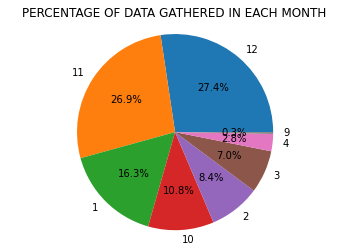

In [83]:
Values = [17777,17484,10574,7038,5469,4574,1847,191]

my_labels = '12','11','1','10','2','3','4','9'
plt.pie(Values,labels=my_labels,autopct='%1.1f%%')
plt.title('PERCENTAGE OF DATA GATHERED IN EACH MONTH')
plt.axis('equal')
plt.show()

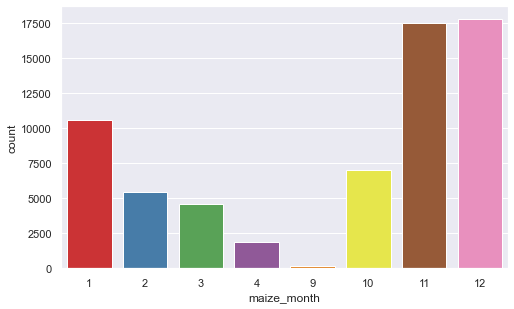

In [85]:
sns.set(rc={'figure.figsize':(8,4.82)})
ax = sns.countplot(x="maize_month", data=new_maize, palette="Set1")

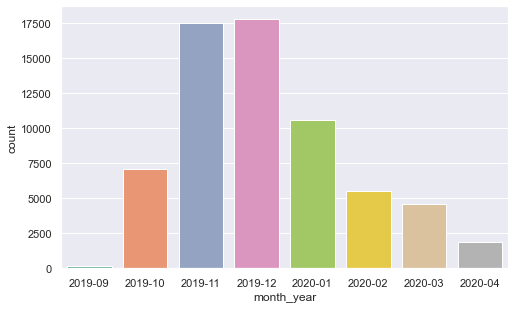

In [86]:
sns.set(rc={'figure.figsize':(8,4.82)})
ax = sns.countplot(x="month_year", data=new_maize, palette="Set2")

### Image class statistics

In [87]:
#summary statistics for image classes shows how many crops were suffering from a certain disease.
new_maize['MAIZE_IMAGE_CLASS'].value_counts()

dsd_lf     43790
faw        16302
healthy     2245
pest        1580
weed        1036
Name: MAIZE_IMAGE_CLASS, dtype: int64

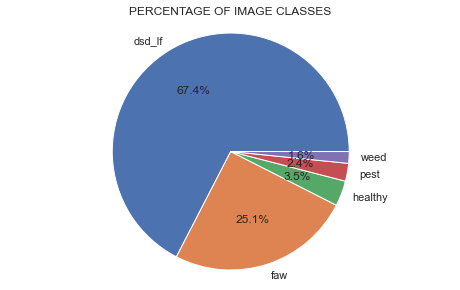

In [88]:
Values = [43790,16302,2245,1580,1036]

my_labels = 'dsd_lf','faw','healthy','pest','weed'
plt.pie(Values,labels=my_labels,autopct='%1.1f%%')
plt.title('PERCENTAGE OF IMAGE CLASSES')
plt.axis('equal')
plt.show()

<AxesSubplot:xlabel='MAIZE_IMAGE_CLASS', ylabel='count'>

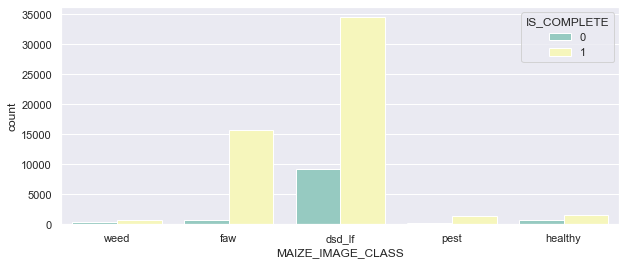

In [90]:
sns.set(rc={'figure.figsize':(10,4)})
sns.countplot(x='MAIZE_IMAGE_CLASS', hue='IS_COMPLETE', data=new_maize, palette="Set3")

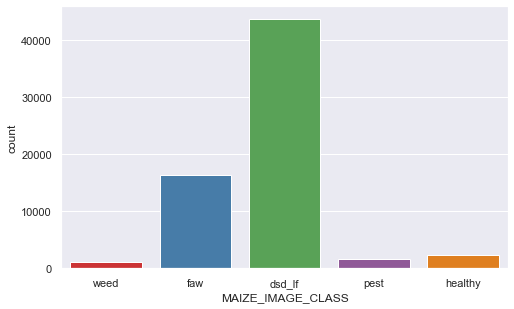

In [91]:
sns.set(rc={'figure.figsize':(8,4.82)})
ax = sns.countplot(x="MAIZE_IMAGE_CLASS", data=new_maize, palette="Set1")

<AxesSubplot:xlabel='maize_month', ylabel='count'>

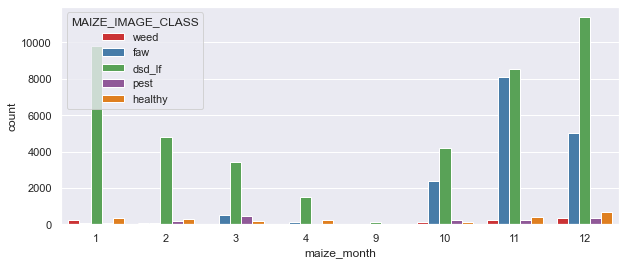

In [94]:
sns.set(rc={'figure.figsize':(10,4)})
sns.countplot(x='maize_month', hue='MAIZE_IMAGE_CLASS', data=new_maize, palette="Set1")

<AxesSubplot:xlabel='month_year', ylabel='count'>

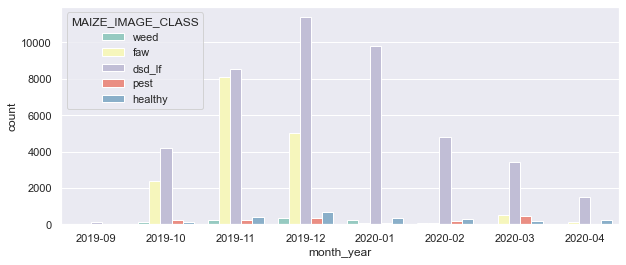

In [97]:
sns.set(rc={'figure.figsize':(10,4)})
sns.countplot(x='month_year', hue='MAIZE_IMAGE_CLASS', data=new_maize, palette="Set3")

In [ ]:
#number of valid and invalid images captured by the users
new_maize['IS_COMPLETE'].value_counts()

In [ ]:
#number of times each comment appeared
new_maize['MAIZE_DATA_COMMENT'].value_counts()

Text(0, 0.5, 'IS_COMLETE')

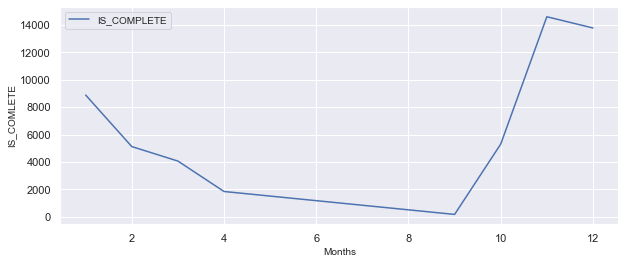

In [98]:
#According to the graph below, the validity of images decreased with time(submission date)
new_maize.groupby(new_maize.SUBMISSION_DATE.dt.month).IS_COMPLETE.sum().plot(subplots=True); plt.legend(loc='best', fontsize=10); plt.xlabel("Months", fontsize=10); plt.ylabel("IS_COMLETE", fontsize=10)

## Dealing with image data

In [6]:
maize.iloc[:,[0,10,7,24]]

,ID,MAIZE_IMAGE_CLASS,IS_COMPLETE,MAIZE_IMAGE_LINKS
0,uuid:751739fc-8820-42ee-a795-18e047d5e89c,weed,1,http://3.19.236.194:8080/ODKAggregate/view/bin...
1,uuid:02ba0fb4-6df1-4b4a-b2f6-89c1bf162280,faw,1,http://3.19.236.194:8080/ODKAggregate/view/bin...
2,uuid:164a12b9-46aa-4de4-a6b0-8a5154e4af8f,dsd_lf,1,http://3.19.236.194:8080/ODKAggregate/view/bin...
3,uuid:ad7f56da-46cf-48b3-8ca1-898467514768,dsd_lf,1,http://3.19.236.194:8080/ODKAggregate/view/bin...
4,uuid:df5866fb-b0cd-4160-a318-9700f4392ba5,pest,1,http://3.19.236.194:8080/ODKAggregate/view/bin...
...,...,...,...,...
64949,uuid:36571be6-b2be-4720-a77e-318aa5375fec,dsd_lf,1,http://3.19.236.194:8080/ODKAggregate/view/bin...
64950,uuid:c3b28fff-8f27-4811-bd28-325828e294d5,dsd_lf,1,http://3.19.236.194:8080/ODKAggregate/view/bin...
64951,uuid:89207c60-743f-4953-b7d6-457edd25fd29,dsd_lf,1,http://3.19.236.194:8080/ODKAggregate/view/bin...
64952,uuid:1d7afd17-1556-44f7-b638-5b90059949c9,faw,1,http://3.19.236.194:8080/ODKAggregate/view/bin...


In [ ]:
new_maize_valid = new_maize[new_maize['IS_COMPLETE'] == 1]
new_maize_valid

In [ ]:
new_maize_invalid = new_maize[new_maize['IS_COMPLETE'] == 0]
new_maize_invalid

# GPS data

In [11]:
new_maize.iloc[:,[14,17]]

,MAIZE_GPS_LAT,MAIZE_GPS_LNG
0,0.424174,32.598598
1,0.521545,32.625263
2,0.521487,32.625396
3,0.521514,32.625405
4,0.521526,32.625352
...,...,...
64949,0.715672,32.422988
64950,0.715513,32.423071
64951,0.715449,32.423232
64952,0.715379,32.423289


In [12]:
maize_gps = new_maize.iloc[:,[14,17]]
maize_gps.columns

Index(['MAIZE_GPS_LAT', 'MAIZE_GPS_LNG'], dtype='object')

In [13]:
maize_gps.to_csv(r'~/Downloads/datasets/maize_gps.csv')

In [7]:
new_maize.columns

Index(['ID', 'CREATION_DATE', 'LAST_UPDATE_DATE', 'IS_COMPLETE',
       'SUBMISSION_DATE', 'MARKED_AS_COMPLETE_DATE', 'MAIZE_IMAGE_CLASS',
       'MAIZE_DATA_SUBMISSION_TIME_RAW', 'MAIZE_DATA_START_TIME_RAW',
       'MAIZE_DATA_SUBMISSION_TIME', 'MAIZE_GPS_ALT', 'MAIZE_DATA_END_TIME',
       'MAIZE_DATA_END_TIME_RAW', 'MAIZE_DATA_COMMENT', 'MAIZE_GPS_LAT',
       'MAIZE_GPS_ACC', 'MAIZE_DATA_START_TIME', 'MAIZE_GPS_LNG'],
      dtype='object')

In [ ]:
new